# Interactive results review

In [1]:
%load_ext autoreload
%autoreload 2 
from IPython.display import Image, display

## 1 Get results

> **Warning 1: Simulated Data**
>
> In this notebook we illustrate how to download and review results
> using unrealistic simulated data. Therefore, nothing in this notebook
> should be taken to represent the results of applying the model to real
> data.

### 1.1 Setup remote connection

When testing or prototyping it is helpful to review the results of a
workflow execution interactively. This is relatively straightforward
when working with locally executed workflows as demonstrated in
[Usage](../../templates/user_example/user_example.qmd). However it is
increasingly the case that the data set sizes and model training
resources will not be available or accessible locally, we would like to
be able to interactively review results even when they have been
computed in a remote cluster with sufficient resources.

In this guide we therefore illustrate working with the results of
workflows that have been executed remotely. In this particular case,
GitHub OAuth access is required to the endpoint associated to the
workflow execution. Given this access, setup the remote client,

In [2]:
from flytekit.remote.remote import FlyteRemote
from flytekit.configuration import Config

remote = FlyteRemote(
    Config.for_endpoint("flyte.cluster.pyrovelocity.net"),
)

### 1.2 Identify results of interest

Login to the UI and copy the URI of the workflow or task whose inputs
and outputs you want to review, and provide these to the `get` method of
the remote client,

In [3]:
workflow_inputs = remote.get(
    "flyte://v1/pyrovelocity/development/pyrovelocity-argo-nix-bui-5c9ebf8-dev-1hk-d5805de62e8044f79d4/f26c1pjy-0-dn0/i"
)
postprocessing_outputs = remote.get(
    "flyte://v1/pyrovelocity/development/pyrovelocity-argo-nix-bui-5c9ebf8-dev-1hk-d5805de62e8044f79d4/f26c1pjy-0-dn0-0-dn6/o"
)

This will not download the results but will provide a summary of the
outputs.

In [4]:
from omegaconf import OmegaConf
from flytekit.interaction.string_literals import literal_map_string_repr
from pyrovelocity.utils import print_config_tree

inputs_dict = literal_map_string_repr(workflow_inputs.literals)
inputs_dictconfig = OmegaConf.create(inputs_dict)
print_config_tree(inputs_dict)

outputs_dict = literal_map_string_repr(postprocessing_outputs.literals)
outputs_dictconfig = OmegaConf.create(outputs_dict)
print_config_tree(outputs_dict)

└── download_dataset_args : 
 data_external_path : data/external 
 data_set_name : simulated 
 data_url : null 
 n_obs : 3000.0 
 n_vars : 2000.0 
 source : simulate 
 postprocess_configuration : 
 number_posterior_samples : 4.0 
 postprocessing_resource_limits : 
 cpu : '16' 
 ephemeral_storage : 200Gi 
 gpu : '0' 
 mem : 60Gi 
 postprocessing_resource_requests : 
 cpu : '8' 
 ephemeral_storage : 50Gi 
 gpu : '0' 
 mem : 30Gi 
 preprocess_data_args : 
 adata : data/external/simulated.h5ad 
 cell_state : leiden 
 count_threshold : 0.0 
 data_processed_path : data/processed 
 data_set_name : simulated 
 default_velocity_mode : dynamical 
 min_shared_counts : 30.0 
 n_neighbors : 30.0 
 n_obs_subset : 300.0 
 n_pcs : 30.0 
 n_top_genes : 2000.0 
 n_vars_subset : 200.0 
 overwrite : false 
 process_cytotrace : false 
 use_obs_subset : true 
 use_vars_subset : true 
 vector_field_basis : umap 
 summarizing_resource_limits : 
 cpu : '16' 
 ephemeral_storage : 200Gi 
 gpu : '0' 
 mem : 60Gi 
 summarizing_resource_requests : 
 cpu : '8' 
 ephemeral_storage : 50Gi 
 gpu : '0' 
 mem : 30Gi 
 train_model_configuration_1 : 
 adata : data/processed/simulated_processed.h5ad 
 batch_size : -1.0 
 cell_specific_kinetics : null 
 data_set_name : simulated 
 force : false 
 guide_type : auto_t0_constraint 
 include_prior : true 
 input_type : raw 
 kinetics_num : 2.0 
 learning_rate : 0.01 
 library_size : true 
 likelihood : Poisson 
 log_every : 100.0 
 max_epochs : 300.0 
 model_identifier : model1 
 model_type : auto 
 num_samples : 30.0 
 offset : false 
 patient_improve : 0.0001 
 patient_init : 45.0 
 seed : 99.0 
 use_gpu : auto 
 train_model_configuration_2 : 
 adata : data/processed/simulated_processed.h5ad 
 batch_size : -1.0 
 cell_specific_kinetics : null 
 data_set_name : simulated 
 force : false 
 guide_type : auto 
 include_prior : true 
 input_type : raw 
 kinetics_num : 2.0 
 learning_rate : 0.01 
 library_size : true 
 likelihood : Poisson 
 log_every : 100.0 
 max_epochs : 300.0 
 model_identifier : model2 
 model_type : auto 
 num_samples : 30.0 
 offset : true 
 patient_improve : 0.0001 
 patient_init : 45.0 
 seed : 99.0 
 use_gpu : auto 
 train_model_resource_limits : 
 cpu : '16' 
 ephemeral_storage : 200Gi 
 gpu : '1' 
 mem : 60Gi 
 train_model_resource_requests : 
 cpu : '8' 
 ephemeral_storage : 50Gi 
 gpu : '1' 
 mem : 30Gi 
 upload_results : false

└── o0 : 
 postprocessed_data : 
 path : gs://pyro-284215-flyte-user-pyrovelocity-dev/data/vx/fd61143y/7a24464111b5f463cf6b982271eecd54/postprocessed.h5ad 
 pyrovelocity_data : 
 path : gs://pyro-284215-flyte-user-pyrovelocity-dev/data/vx/fd61143y/0e59fc4fadc56cc5ec930e1bab4a0186/pyrovelocity.pkl.zst

### 1.3 Download results

Download the results you would like to review,

In [5]:
from pyrovelocity.io.gcs import download_blob_from_uri

pyrovelocity_data = download_blob_from_uri(
    outputs_dictconfig.o0.pyrovelocity_data.path
)
postprocessed_data = download_blob_from_uri(
    outputs_dictconfig.o0.postprocessed_data.path
)

[14:09:47] INFO pyrovelocity.io.gcs 
 File pyrovelocity.pkl.zst already exists. 
 The hash of the requested file has not been checked. 
 Delete and re-run to download again.

INFO pyrovelocity.io.gcs 
 File postprocessed.h5ad already exists. 
 The hash of the requested file has not been checked. 
 Delete and re-run to download again.

## 2 Analyze results

### 2.1 Load data

In this example, we load the postprocessed data from the downloaded
file,

In [6]:
import scanpy as sc
from pyrovelocity.utils import print_anndata

adata = sc.read(postprocessed_data)
print_anndata(adata)

INFO pyrovelocity.utils 
 AnnData object with n_obs × n_vars = 300 × 200 
 obs: 
 true_t, 
 u_lib_size_raw, 
 s_lib_size_raw, 
 initial_size_unspliced, 
 initial_size_spliced, 
 initial_size, 
 n_counts, 
 leiden, 
 velocity_self_transition, 
 root_cells, 
 end_points, 
 velocity_pseudotime, 
 latent_time, 
 u_lib_size, 
 s_lib_size, 
 u_lib_size_mean, 
 s_lib_size_mean, 
 u_lib_size_scale, 
 s_lib_size_scale, 
 ind_x, 
 velocity_pyro_self_transition, 
 var: 
 true_t_, 
 true_alpha, 
 true_beta, 
 true_gamma, 
 true_scaling, 
 means, 
 dispersions, 
 dispersions_norm, 
 highly_variable, 
 fit_r2, 
 fit_alpha, 
 fit_beta, 
 fit_gamma, 
 fit_t_, 
 fit_scaling, 
 fit_std_u, 
 fit_std_s, 
 fit_likelihood, 
 fit_u0, 
 fit_s0, 
 fit_pval_steady, 
 fit_steady_u, 
 fit_steady_s, 
 fit_variance, 
 fit_alignment_scaling, 
 velocity_genes, 
 uns: 
 _scvi_manager_uuid, 
 _scvi_uuid, 
 leiden, 
 log1p, 
 neighbors, 
 pca, 
 recover_dynamics, 
 umap, 
 velocity_graph, 
 velocity_graph_neg, 
 velocity_params, 
 velocity_pyro_graph, 
 velocity_pyro_graph_neg, 
 velocity_pyro_params, 
 obsm: 
 X_pca, 
 X_umap, 
 velocity_pyro_pca, 
 velocity_pyro_umap, 
 velocity_umap, 
 varm: 
 PCs, 
 loss, 
 layers: 
 Ms, 
 Mu, 
 fit_t, 
 fit_tau, 
 fit_tau_, 
 raw_spliced, 
 raw_unspliced, 
 spliced, 
 spliced_pyro, 
 unspliced, 
 velocity, 
 velocity_pyro, 
 velocity_u, 
 obsp: 
 connectivities, 
 distances,

as well as the posterior samples,

In [7]:
from pyrovelocity.utils import pretty_print_dict
from pyrovelocity.io import CompressedPickle

posterior_samples = CompressedPickle.load(pyrovelocity_data)
pretty_print_dict(posterior_samples)

INFO pyrovelocity.utils 
 alpha: 
 ( 4 , 1 , 200 ) 
 gamma: 
 ( 4 , 1 , 200 ) 
 beta: 
 ( 4 , 1 , 200 ) 
 u_offset: 
 ( 4 , 1 , 200 ) 
 s_offset: 
 ( 4 , 1 , 200 ) 
 t0: 
 ( 4 , 1 , 200 ) 
 u_scale: 
 ( 4 , 1 , 200 ) 
 dt_switching: 
 ( 4 , 1 , 200 ) 
 u_inf: 
 ( 4 , 1 , 200 ) 
 s_inf: 
 ( 4 , 1 , 200 ) 
 switching: 
 ( 4 , 1 , 200 ) 
 cell_time: 
 ( 4 , 300 , 1 ) 
 u_read_depth: 
 ( 4 , 300 , 1 ) 
 s_read_depth: 
 ( 4 , 300 , 1 ) 
 cell_gene_state: 
 ( 4 , 300 , 200 ) 
 gene_ranking: 
 mean_mae time_correlation mean_mae_rank time_correlation_rank \ 
 genes 
 1839 -1.003846 0.668120 36.0 6.0 
 927 -1.007514 0.666899 170.0 7.0 
 15 -1.007746 0.649332 174.5 9.0 
 1335 -1.008876 0.618205 189.0 17.0 
 819 -1.006924 0.611386 157.0 20.0 
 ... ... ... ... ... 
 1211 -1.004797 -0.682012 58.0 5.0 
 707 -1.001553 -0.693052 5.0 4.0 
 1055 -1.006048 -0.742795 120.0 3.0 
 1911 -1.005882 -0.750126 106.0 2.0 
 1751 -1.002551 -0.860600 11.0 1.0 
 
 rank_product selected genes 
 genes 
 1839 216.0 1 
 927 1190.0 1 
 15 1570.5 1 
 1335 3213.0 1 
 819 3140.0 0 
 ... ... ... 
 1211 290.0 0 
 707 20.0 0 
 1055 360.0 0 
 1911 212.0 0 
 1751 11.0 0 
 
 [ 200 rows x 6 columns ] 
 original_spaces_embeds_magnitude: 
 ( 4 , 300 ) 
 genes: 
 [ '1839' , '927' , '15' , '1335' ] 
 vector_field_posterior_samples: 
 ( 4 , 300 , 2 ) 
 vector_field_posterior_mean: 
 ( 300 , 2 ) 
 fdri: 
 ( 300 , ) 
 embeds_magnitude: 
 ( 4 , 300 ) 
 embeds_angle: 
 ( 4 , 300 ) 
 ut_mean: 
 ( 300 , 200 ) 
 st_mean: 
 ( 300 , 200 ) 
 pca_vector_field_posterior_samples: 
 ( 4 , 300 , 50 ) 
 pca_embeds_angle: 
 ( 4 , 300 ) 
 pca_fdri: 
 ( 300 , )

### 2.2 Extract results of interest

In this case, we extract the gene selection data by cooptimizing MAE and
correlation between spliced expression levels and estimates of temporal
ordering

In [8]:
from pyrovelocity.analysis.analyze import pareto_frontier_genes

volcano_data = posterior_samples["gene_ranking"]
number_of_marker_genes = min(
    max(int(len(volcano_data) * 0.1), 4), 6, len(volcano_data)
)
putative_marker_genes = pareto_frontier_genes(
    volcano_data, number_of_marker_genes
)

INFO pyrovelocity.analysis.analyze 
 Found 4 genes on the current Pareto frontier: 
 
 [ '787' , '1635' , '1379' , '1839' ] 
 
 Genes identified thus far: 4 . 
 Number of iterations: 1 . 
 Number of genes remaining: 196 .

INFO pyrovelocity.analysis.analyze 
 Found 10 genes on the current Pareto frontier: 
 
 [ '227' , '487' , '1791' , '1863' , '667' , '1891' , '507' , '1739' , '819' , '927' ] 
 
 Genes identified thus far: 14 . 
 Number of iterations: 2 . 
 Number of genes remaining: 186 .

INFO pyrovelocity.analysis.analyze 
 Found 6 genes on the Pareto frontier for 6 requested: 
 
 [ '1839' , '1379' , '1635' , '487' , '787' , '227' ]

### 2.3 Generate plots

#### 2.3.1 Gene selection summary plot

Here we re-generate the gene selection summary plot.

In [9]:
from pyrovelocity.plots import plot_gene_selection_summary

vector_field_basis = inputs_dictconfig.preprocess_data_args.vector_field_basis
cell_state = inputs_dictconfig.preprocess_data_args.cell_state

plot_gene_selection_summary(
    adata=adata,
    posterior_samples=posterior_samples,
    basis=vector_field_basis,
    cell_state=cell_state,
    plot_name="gene_selection_summary_plot.pdf",
    selected_genes=putative_marker_genes,
    show_marginal_histograms=False,
)

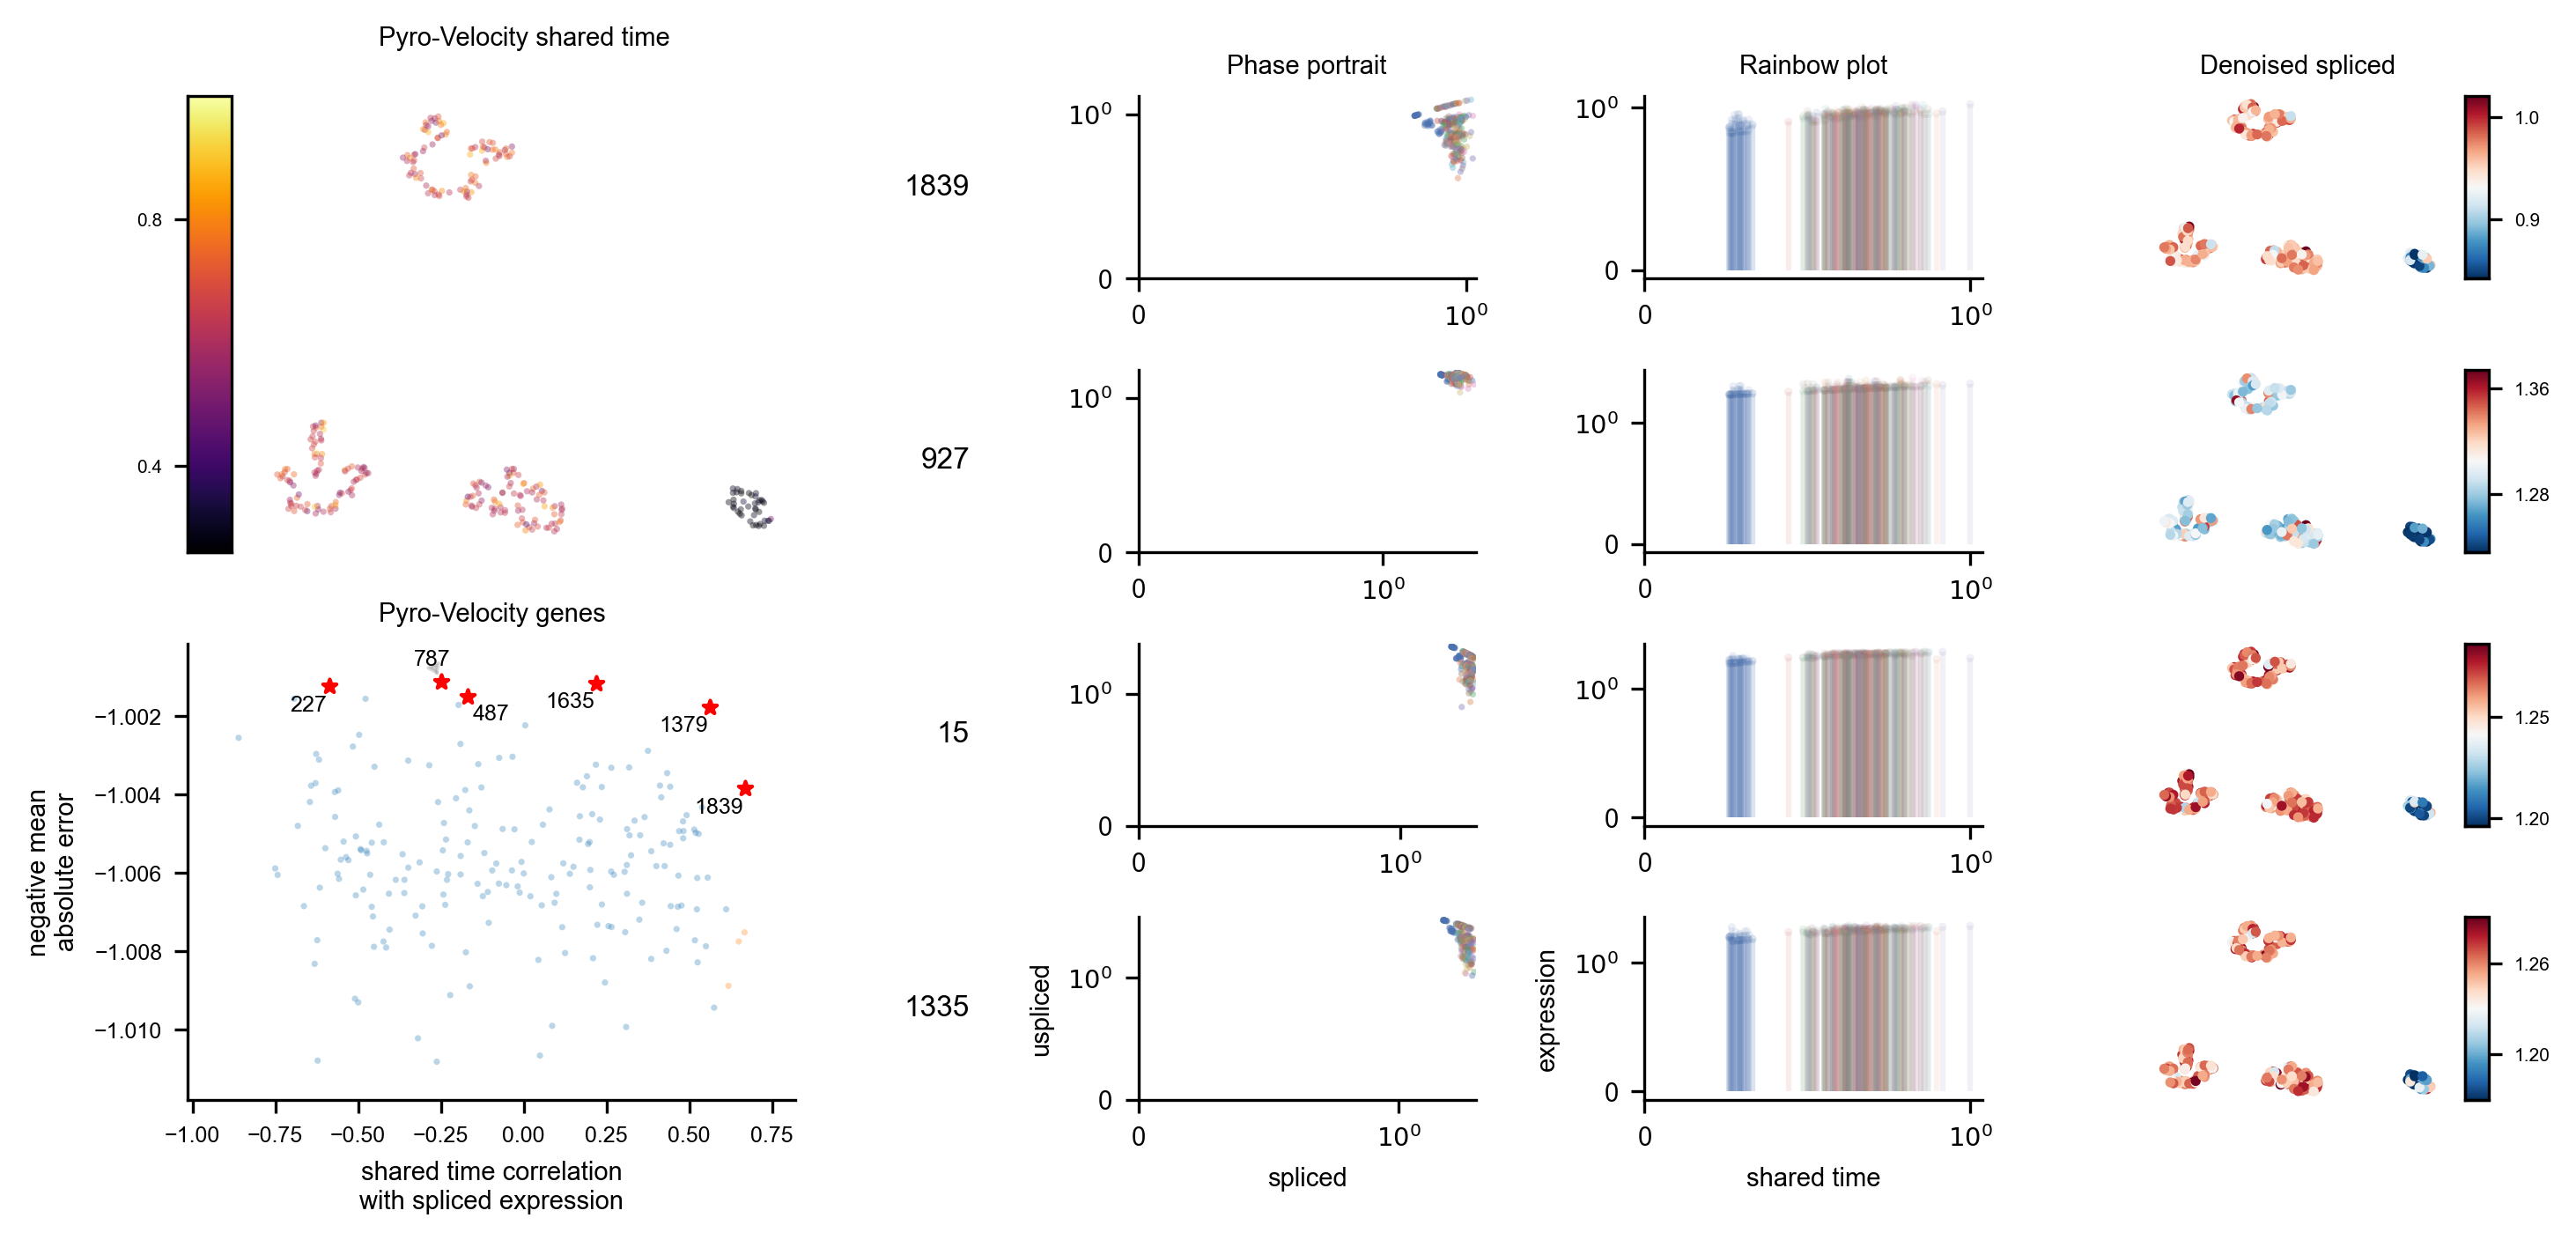

In [10]:
display(Image(filename=f"gene_selection_summary_plot.pdf.png"))

#### 2.3.2 Phase portraits from custom gene list

One of the primary applications of interactive review may be to explore
specific genes of interest. Here we generate phase portraits for a
randomly selected list of genes.

In [11]:
from pyrovelocity.plots import rainbowplot

vector_field_basis = inputs_dictconfig.preprocess_data_args.vector_field_basis
cell_state = inputs_dictconfig.preprocess_data_args.cell_state

rainbowplot(
    volcano_data=volcano_data,
    adata=adata,
    posterior_samples=posterior_samples,
    genes=["1839", "927", "15"],
    data=["st", "ut"],
    basis=vector_field_basis,
    cell_state=cell_state,
    save_plot=True,
    rainbow_plot_path="gene_selection_rainbow_plot.pdf",
)

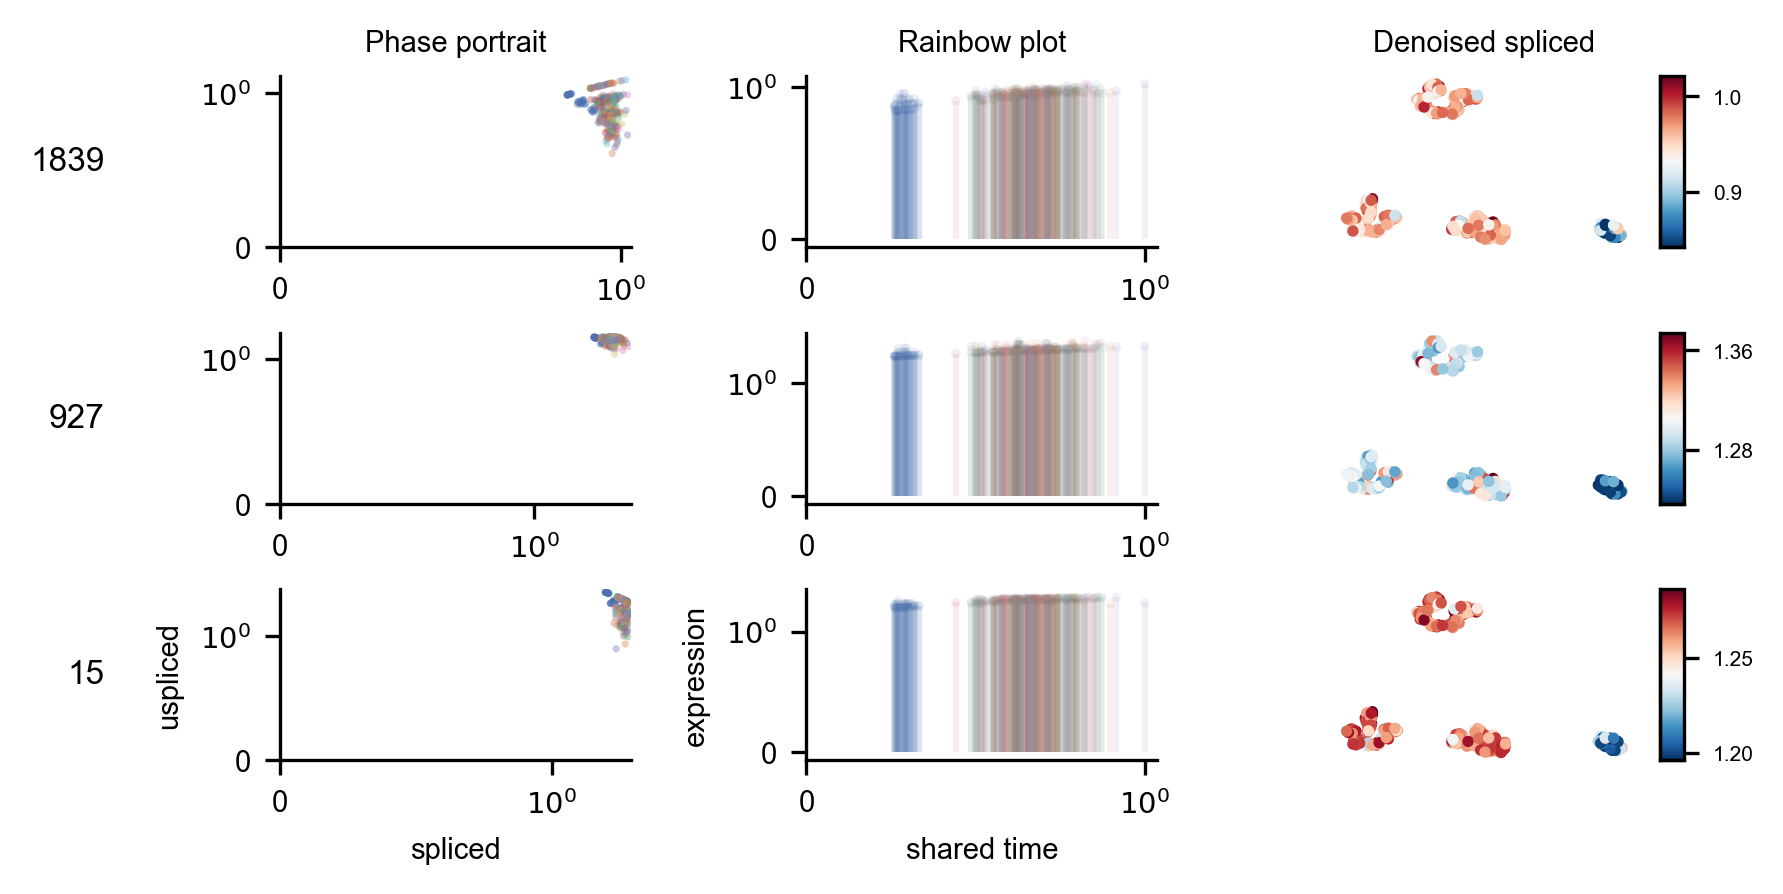

In [12]:
display(Image(filename=f"gene_selection_rainbow_plot.pdf.png"))

Of course, you can generate any plot of interest relevant to the loaded
data. See the [plots package
source](https://github.com/pinellolab/pyrovelocity/tree/main/src/pyrovelocity/plots),
[plots API reference](../../reference/plots.qmd), and the guide for the
[workflow summarization
task](https://github.com/pinellolab/pyrovelocity/blob/main/src/pyrovelocity/tasks/summarize.py)
for ideas regarding built-in or custom plots.

### 2.4 Save data files

We may also want to write data tables to review. Here we save the
parameter posterior distribution table

In [13]:
from pyrovelocity.utils import save_parameter_posterior_mean_dataframe

save_parameter_posterior_mean_dataframe(
    adata=adata,
    input_dict=posterior_samples,
    dataframe_path="gene_parameter_posterior_mean.csv",
)

[14:09:51] INFO pyrovelocity.utils 
 Saving gene parameter posteriors to file: 
 gene_parameter_posterior_mean.csv

200 rows × 12 columns

and the gene selection table

In [14]:
posterior_samples["gene_ranking"].to_csv("gene_ranking.csv")
posterior_samples["gene_ranking"]

200 rows × 6 columns